<a href="https://colab.research.google.com/github/jcea97/drug-discovery-project/blob/main/drug_discovery_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Jesús Cea García

# **Cargamos el dataset de la primera parte con los datos de bioactividad**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data1.csv')

# **Calculamos los predictores de Lipinkski**

Utilizamos una serie de reglas desarrolladas por Christopher Lipinkski de Pfizer para evaluar la efectividad de los compuestos basadas en las propiedades farmacoquinéticas de absorción, distribución, metabolismo y excreción (ADME). De acuerdo a estas reglas, la mayor parte de fármacos orales tienen:



*   Peso molecular < 500 Dalton
*   LogP < 5
*   Donantes de enlace de hidrógeno < 5
*   Aceptores de enlace de hidrógeno < 10



# **Importamos librerías**

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 12.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

La siguiente función básicamente toma la SMILE notation (estructura química de los compuestos) y obtener los descriptores moleculares anteriores.

In [ ]:
# https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

# **Aplicamos la función sobre los datos SMILE de nuestro conjunto y obtenemos un nuevo dataset con los descriptores de Lipinski**

Tenemos valores faltantes que vamos a eliminar

In [ ]:
df = df[df.canonical_smiles.isna() == False]

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

# **Vamos a combinar ambos data.frame**

In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0
...,...,...,...,...
8125,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,46000.0
8126,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,38310.0
8127,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,1710.0
8128,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,10000.0


In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
8123,301.298,2.0110,4.0,6.0
8124,105.093,-1.6094,3.0,3.0
8125,401.474,2.9571,3.0,5.0
8126,387.447,2.6149,4.0,5.0


In [ ]:
#Reseteamos indices porque al eliminar valores faltantes en df se han modificado y no se realzia el concat conrrectamente
df = df.reset_index(drop=True)
df_lipinski = df_lipinski.reset_index(drop=True)

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined.isna().sum()

,0
molecule_chembl_id,0
canonical_smiles,0
bioactivity_class,0
standard_value,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0


In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,46000.0,301.298,2.0110,4.0,6.0
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,38310.0,105.093,-1.6094,3.0,3.0
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,1710.0,401.474,2.9571,3.0,5.0
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,10000.0,387.447,2.6149,4.0,5.0


# **Convertir IC50 a pIC50**

Vamos a utilizar esta transformación para que los valores estén más uniformemente distribuidos ya que hay valores muy grandes y valores muy pequeños.

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,8.128000e+03
mean,9.621716e+04
std,9.840917e+05
min,0.000000e+00
25%,1.000000e+02
50%,1.504500e+03
75%,1.240000e+04
max,5.000000e+07


Vemos que el mínimo es 0 nM y el máximo es 5.000000e+07 nM

Creamos una función que pase todos los valores a M y realice la transformación -log. Además obtendremos un nuevo data frame sin la columna standard_value y con la nueva columna pIC50 con la transformación.

In [ ]:
import numpy as np
def pIC50(df):
    df = df.copy()

    # Evitar log(0) reemplazando valores 0 con el mínimo posible (1e-9 M)
    df["standard_value_norm"] = df["standard_value_norm"].replace(0, 1e-9)

    # Transformación logarítmica
    df["pIC50"] = -np.log10(df["standard_value_norm"] * 1e-9)

    return df

Creamos además una función para que aquellos valores por encima de 100000000 se fijen en 100000000 para evitar valores negativos.

In [ ]:
import pandas as pd
import numpy as np

def norm_value(df):
    df = df.copy()  # Para evitar modificar el DataFrame original
    df["standard_value_norm"] = np.where(df["standard_value"] > 10**8, 10**8, df["standard_value"])
    return df

In [ ]:
df_norm = norm_value(df_combined)

In [ ]:
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,46000.0,301.298,2.0110,4.0,6.0,46000.0
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,38310.0,105.093,-1.6094,3.0,3.0,38310.0
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,1710.0,401.474,2.9571,3.0,5.0,1710.0
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,10000.0,387.447,2.6149,4.0,5.0,10000.0


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.325,2.8032,0.0,6.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.913,4.5546,0.0,5.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.851,5.3574,0.0,5.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.845,4.7069,0.0,5.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.334,3.0953,0.0,6.0,800.0,6.096910
...,...,...,...,...,...,...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,46000.0,301.298,2.0110,4.0,6.0,46000.0,4.337242
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,38310.0,105.093,-1.6094,3.0,3.0,38310.0,4.416688
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,1710.0,401.474,2.9571,3.0,5.0,1710.0,5.767004
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,10000.0,387.447,2.6149,4.0,5.0,10000.0,5.000000


In [ ]:
df_final.pIC50.describe()

,pIC50
count,8128.000000
mean,5.961554
std,1.589364
min,1.301030
25%,4.906578
50%,5.822610
75%,7.000000
max,18.000000


Ahora el mínimo es 1.3 y el máximo es 18, una escala mucho más uniforme.

# **Vamos a quitar los compuestos con bioactividad de clase intermedia**

In [ ]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.325,2.8032,0.0,6.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.913,4.5546,0.0,5.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.851,5.3574,0.0,5.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.845,4.7069,0.0,5.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.334,3.0953,0.0,6.0,800.0,6.096910
...,...,...,...,...,...,...,...,...,...,...
8122,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,inactive,58370.0,243.262,1.8587,2.0,4.0,58370.0,4.233810
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,46000.0,301.298,2.0110,4.0,6.0,46000.0,4.337242
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,38310.0,105.093,-1.6094,3.0,3.0,38310.0,4.416688
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,10000.0,387.447,2.6149,4.0,5.0,10000.0,5.000000


In [ ]:
df_2class.to_csv('bioactivity_data_2class_pIC50_acetylcolinesterase.csv')

# **Exploratory Data Analysis (EDA)**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

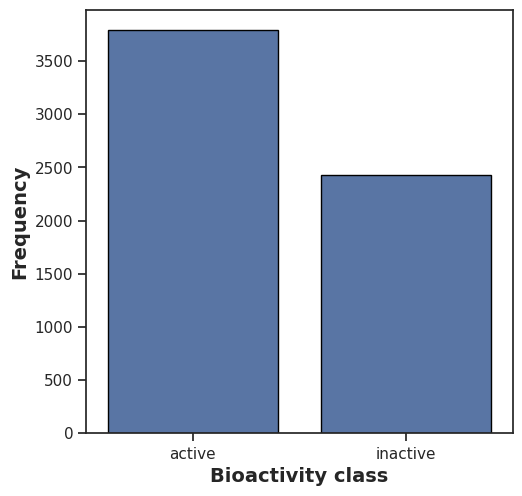

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

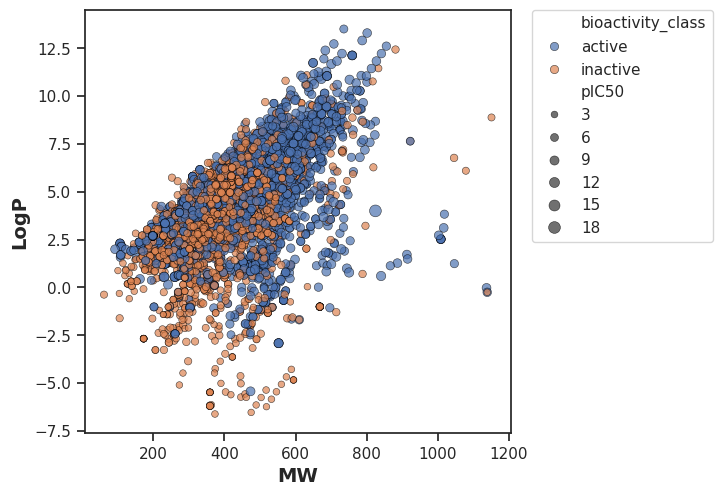

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

LogP es una medida de la lipofilia y MW es peso molecular. Hay cierta relación lineal positiva entre ambas, lo cual es lógico ya que una molécula de gran tamaño tiende a ser menos hidrófila. Por otro lado, no se observan diferencias en cuanto a la distribución de los compuestos activos e inactivos.

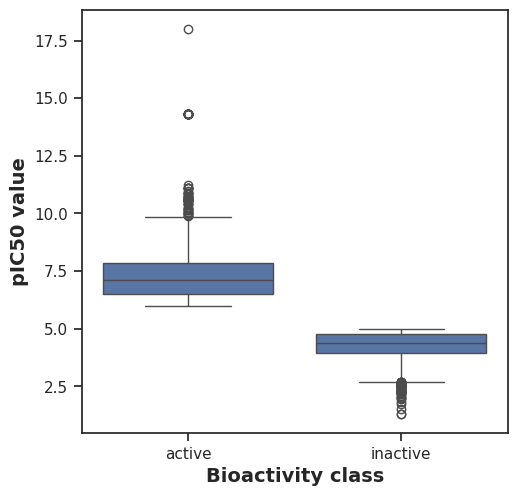

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Evidentemente, las moléculas activas van a tener un mayor pIC50 que las inactivas (recordemos que el pIC50 va a ser inversamente proporcional al IC50 debido a la transformación logarítmica negativa en base 10).

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,9205611.0,0.0,0.05,Different distribution (reject H0)


Confirmamos lo anterior con un test U de Mann-Whitney.

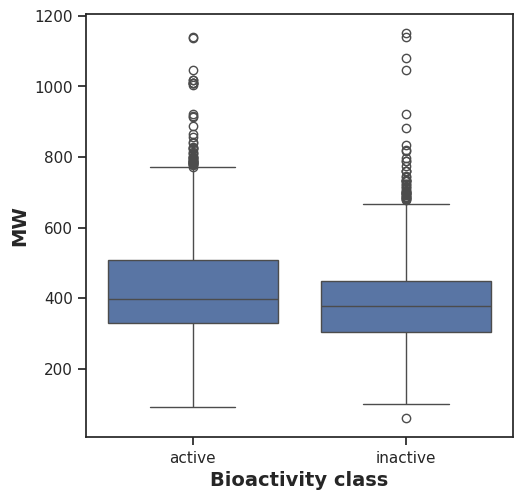

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,5292767.0,1.724955e-23,0.05,Different distribution (reject H0)


 Parece haber diferencias significativas entre las moléculas inactivas y activas en cuanto a peso molecular.

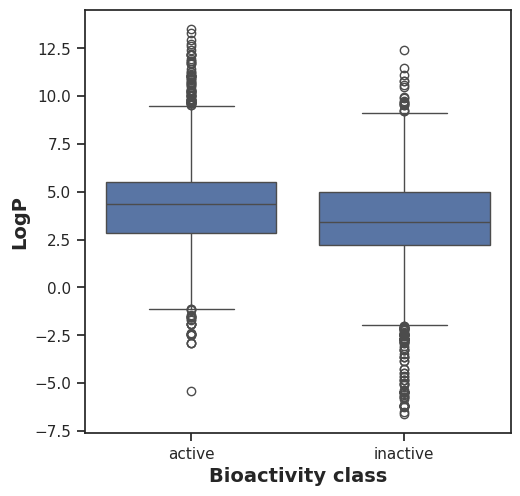

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,5637431.0,1.037892e-50,0.05,Different distribution (reject H0)


Hay diferencias significativas en cuanto a LogP entre moléculas activas e inactivas.

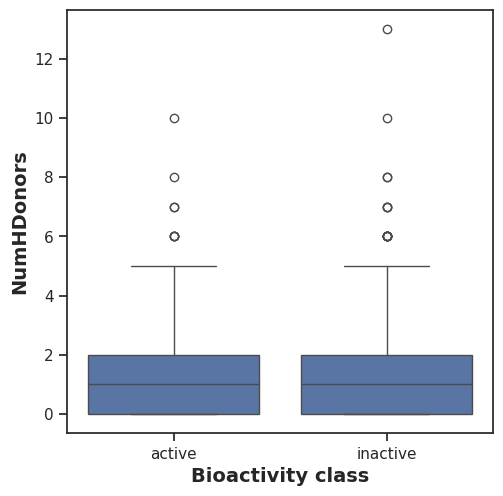

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,4991311.5,2.839090e-09,0.05,Different distribution (reject H0)


Parece haber diferencias significativas en cuanto al Número de donantes de hidrógeno.

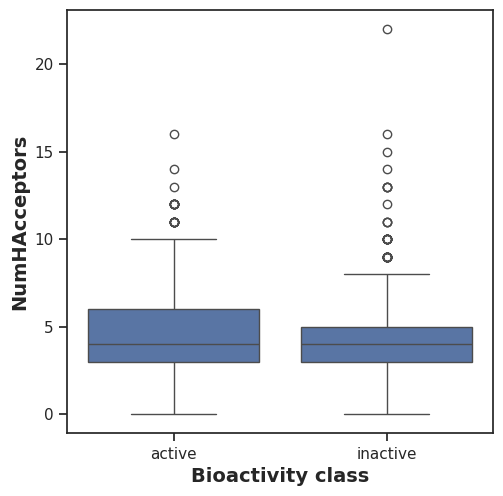

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4599954.0,0.966553,0.05,Same distribution (fail to reject H0)


No hay diferencias significativas en cuanto a aceptores de hidrógeno.

# **Archivos zip**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

Scanning files ..
  adding: bioactivity_data_2class_pIC50_acetylcolinesterase.csv (deflated 76%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 36%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: bioactivity_preprocessed_data1.csv (deflated 83%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
